# fashion mnist

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 탐색

In [5]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

### 데이터 전처리

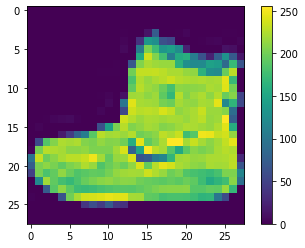

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

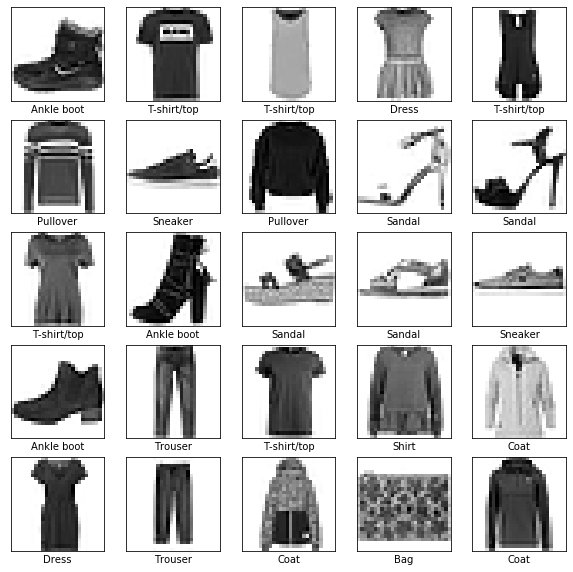

In [15]:
# 처음 25개 이미지와 클래스 이름 출력

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성
### 층(layer) 설정

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'), # 완전연결
    keras.layers.Dense(10, activation='softmax')
])

### 모델 컴파일 (손실함수, 옵티마이저, 지표)

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### 모델 훈련 (훈련 데이터 주입 -> 테스트 데이터셋에 대한 예측 생성)

In [19]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4983 - accuracy: 0.8252
Epoch 2/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3766 - accuracy: 0.8637
Epoch 3/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3392 - accuracy: 0.8761s - loss: 0
Epoch 4/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3145 - accuracy: 0.8834
Epoch 5/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2963 - accuracy: 0.8905


### 정확도 평가

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

10000/1 - 0s - loss: 0.2806 - accuracy: 0.8719

테스트 정확도: 0.8719


In [ ]:
### 예측 만들기

In [23]:
predictions = model.predict(test_images)

In [24]:
predictions[0] # 10개의 숫자 배열 (모델의 신뢰도를 나타냄)

array([1.1488588e-04, 5.7449231e-08, 3.6894747e-07, 1.3906162e-08,
       1.3920347e-06, 1.5398977e-02, 2.9927756e-05, 1.1928737e-01,
       2.2118122e-05, 8.6514485e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [28]:
# 10개 클래스에 대한 예측 그래프로 표현

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}%({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]), color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

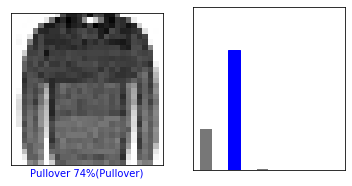

In [31]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

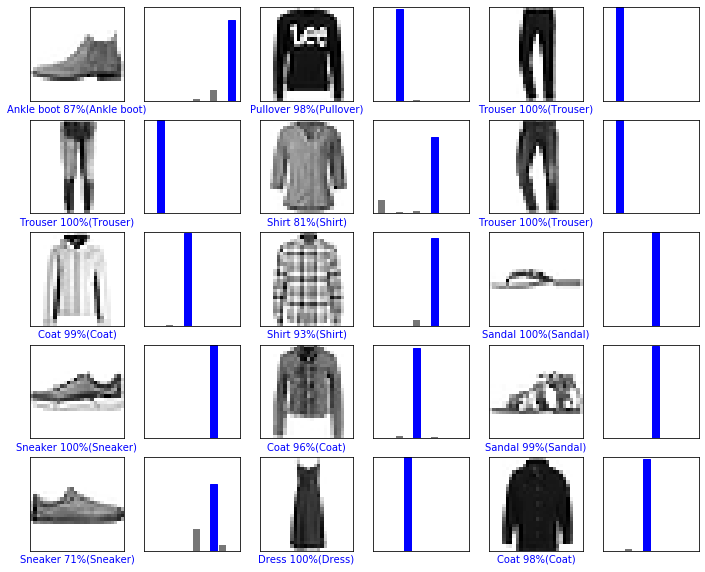

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [34]:
img = test_images[0]
print(img.shape)

(28, 28)


In [35]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [36]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.1488579e-04 5.7449242e-08 3.6894684e-07 1.3906191e-08 1.3920323e-06
  1.5398964e-02 2.9927734e-05 1.1928722e-01 2.2118125e-05 8.6514503e-01]]


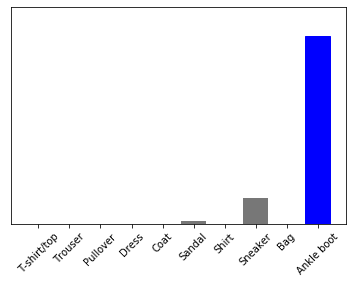

In [37]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [38]:
np.argmax(predictions_single[0])

9